In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
veri=pd.read_csv(url,sep=',',names=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings'])
veri.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
veri['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [5]:
veri.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [6]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


<AxesSubplot:>

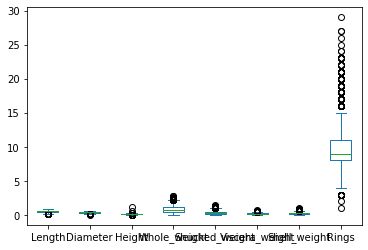

In [7]:
veri.plot.box()

In [8]:
Q1=veri['Rings'].quantile(0.25)
Q3=veri['Rings'].quantile(0.75)
IQR=Q3-Q1
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR

In [9]:
veri.loc[veri['Rings']<alt_sinir,'Rings']=alt_sinir
veri.loc[veri['Rings']>ust_sinir,'Rings']=ust_sinir

<AxesSubplot:>

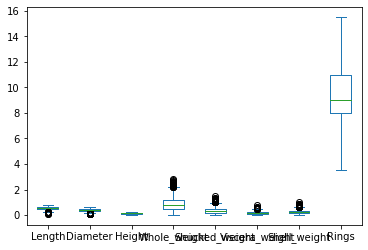

In [10]:
A1=veri['Height'].quantile(0.25)
A3=veri['Height'].quantile(0.75)
AQR=A3-A1
altt_sinir=A1-1.5*AQR
ustt_sinir=A3+1.5*AQR
veri.loc[veri['Height']<altt_sinir,'Height']=altt_sinir
veri.loc[veri['Height']>ustt_sinir,'Height']=ustt_sinir
veri.plot.box()

In [11]:
x=veri.drop('Sex',axis=1)
y=veri['Sex']
x_egitim,x_test,y_egitim,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [12]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import*

In [13]:
model=[]
model.append(('model_nb',GaussianNB()))
model.append(('model_lg',LogisticRegression()))
model.append(('model_knn',KNeighborsClassifier()))
for name,i in model:
    kfold=KFold(n_splits=10,random_state=0,shuffle=True)
    veriler=cross_val_score(i,x_egitim,y_egitim,cv=kfold,scoring='accuracy')
    print(name," ICIN KFOLD SONUCU = %.2f"%veriler.mean())

model_nb  ICIN KFOLD SONUCU = 0.52


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

model_lg  ICIN KFOLD SONUCU = 0.55
model_knn  ICIN KFOLD SONUCU = 0.52


In [14]:
for name,i in model:
    i.fit(x_egitim,y_egitim)
    tahmin_test=i.predict(x_test)
    print(name," ICIN TEST TAHMIN SONUCLARI: %.2f"%accuracy_score(y_test,tahmin_test))

model_nb  ICIN TEST TAHMIN SONUCLARI: 0.53
model_lg  ICIN TEST TAHMIN SONUCLARI: 0.56
model_knn  ICIN TEST TAHMIN SONUCLARI: 0.56


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_lg=LogisticRegression()
model_lg.fit(x_egitim,y_egitim)
while True:
    liste=[]
    Length=float(input("UZUNLUK GIRINIZ: "))
    liste.append(Length)
    Diameter=float(input("CAPI GIRINIZ: "))
    liste.append(Diameter)
    Height=float(input("YUKSEKLIK GIRINIZ: "))
    liste.append(Height)
    Whole_weight=float(input("TUM AGIRLIK GIRINIZ: "))
    liste.append(Whole_weight)
    Shucked_weight=float(input("BUKULMUS AGIRLIK GIRINIZ: "))
    liste.append(Shucked_weight)
    Viscera_weight=float(input("IC ORGAN AGIRLIGINI GIRINIZ: "))
    liste.append(Viscera_weight)
    Shell_weight=float(input("KABUK AGIRLIGINI GIRINIZ: "))
    liste.append(Shell_weight)
    Rings=float(input("HALKA SAYISINI GIRINIZ: "))
    liste.append(Rings)
    dene=np.array([liste])
    tahmin_veri=model_lg.predict(dene)
    print(tahmin_veri)
    cevap=str(input("ISLEM DEVAM ETSIN MI: ")).upper()
    if(cevap=='E'):
        continue
    else:
        break

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
